#2. Representación gráfica de datos y métricas

In [1]:
import pandas as pd

In [3]:
# cargar dataset generado
df_stores = pd.read_csv('df_stores.csv')
df_stores.head()

,id,store_id,store,address,zip_code,types,rating,total_ratings,location_lat,location_lng,conv_rate
0,ChIJBe7XKMvJBZERLxXLXN2i0bQ,1,T. ANGAMOS,"Angamos Open Plaza, Av. Angamos Este 1803, Sur...",15038,"department_store,food,point_of_interest,store,...",4.2,3499,-12.112123,-77.011967,0.325641
1,ChIJCYWX9UJKQpERd-1IXrKzHkA,2,T. AREQUIPA CAYMA,"Mallplaza, Av. Ejército 793, Cayma 04014, Perú",4014,"department_store,food,point_of_interest,store,...",4.0,11065,-16.390443,-71.546741,0.301041
2,ChIJeZLHYBpLQpERRLRv3_-pNnE,3,T. AREQUIPA PORONGOCHE,"Mall Aventura Plaza, Arequipa, Av. Porongoche ...",4008,"department_store,point_of_interest,store,estab...",3.9,3771,-16.416682,-71.514465,0.233449
3,ChIJe7R12Gu4BZERgoGU7LEot3Y,4,T. ATOCONGO,"Centro Comercial, Estacionamiento Open Pl. Ato...",15803,"department_store,food,point_of_interest,store,...",4.0,1457,-12.146962,-76.981434,0.376608
4,ChIJA_TqGVjJBZERWUarkHURiHk,5,T. BELLAVISTA,"Mall Aventura Plaza, Av. Óscar R. Benavides 38...",7011,"department_store,shopping_mall,store,food,poin...",4.1,4285,-12.055882,-77.101058,0.317479


In [4]:
# Definir la similitud entre nodos
from sklearn.metrics.pairwise import cosine_similarity

def calcular_similitud(store1, store2):
  # Weights
  weight_rating = 0.20
  weight_tot_rating = 0.10
  weight_conv_rate = 0.25
  weight_region = 0.35
  weight_types = 0.10

  # Atributos numericos
  rating1 = store1['rating']
  rating2 = store2['rating']
  tot_rating1 = store1['total_ratings']
  tot_rating2 = store2['total_ratings']
  conv_rate1 = store1['conv_rate']
  conv_rate2 = store2['conv_rate']

  # Atributos categoricos
  region1 = set([str(store1['zip_code'])[:2]])
  region2 = set([str(store2['zip_code'])[:2]])
  types1 = set(store1['types']. split(','))
  types2 = set(store2['types']. split(','))

  # Calcular similitud atributos numericos
  sim_rating = cosine_similarity([[rating1]], [[rating2]])[0][0]
  sim_tot_rating = cosine_similarity([[tot_rating1]], [[tot_rating2]])[0][0]
  sim_conv_rate = cosine_similarity([[conv_rate1]], [[conv_rate2]])[0][0]

  # Calcular similitud atributos categoricos
  dist_jaccard_region = 1 - (len(region1.intersection(region2)) / len(region1.union(region2)))
  sim_region = 1 - dist_jaccard_region

  dist_jaccard_types = 1 - (len(types1.intersection(types2)) / len(types1.union(types2)))
  sim_types = 1 - dist_jaccard_types

  similarity = (weight_rating * sim_rating + weight_tot_rating * sim_tot_rating + weight_conv_rate * sim_conv_rate + weight_region * sim_region + weight_types * sim_types)

  return similarity


In [5]:
 # Definir el grafo
import networkx as nx
import matplotlib.pyplot as plt
import math

G = nx.Graph()

for index, store in df_stores.iterrows():
  G.add_node(store['store_id'], name=store['store'])

for node1 in G.nodes():
  list_sim = []
  for node2 in G.nodes():
    if node1 != node2:
      store1 = df_stores[df_stores['store_id'] == node1].iloc[0]
      store2 = df_stores[df_stores['store_id'] == node2].iloc[0]
      similitud = round(calcular_similitud(store1, store2),2)
      list_sim.append(similitud)
      if similitud >= 0.8:
        G.add_edge(node1, node2, weight=similitud)


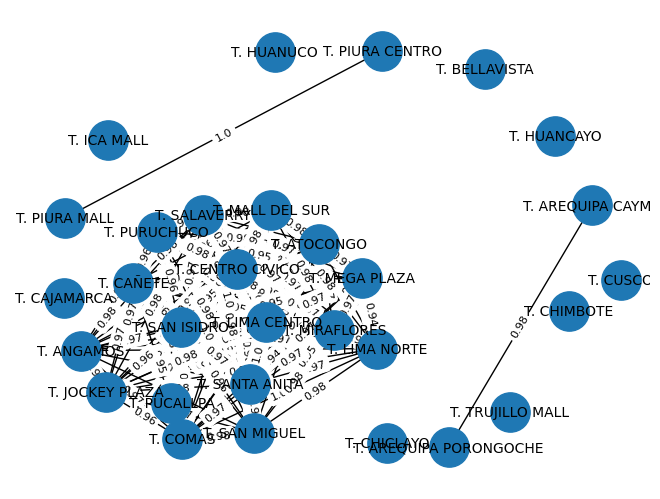

In [7]:
# Dibujar el grafo
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=False, node_size=800, font_size=10, font_weight="bold")
labels = {node: data['name'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10, font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.show()

In [8]:
avg_degree_centrality = sum(nx.degree_centrality(G).values()) / len(G)
print('Degree centrality (Global):', avg_degree_centrality)

print('Degree centrality (Node):')
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Degree centrality (Global): 0.2804597701149426
Degree centrality (Node):
T. ANGAMOS: 0.517
T. ATOCONGO: 0.517
T. CAÑETE: 0.517
T. CENTRO CIVICO: 0.517
T. COMAS: 0.517
T. JOCKEY PLAZA: 0.517
T. LIMA CENTRO: 0.517
T. LIMA NORTE: 0.517
T. MALL DEL SUR: 0.517
T. MEGA PLAZA: 0.517
T. MIRAFLORES: 0.517
T. PURUCHUCO: 0.517
T. SALAVERRY: 0.517
T. SAN ISIDRO: 0.517
T. SAN MIGUEL: 0.517
T. SANTA ANITA: 0.517
T. AREQUIPA CAYMA: 0.0345
T. AREQUIPA PORONGOCHE: 0.0345
T. PIURA CENTRO: 0.0345
T. PIURA MALL: 0.0345
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. PUCALLPA: 0.0
T. TRUJILLO MALL: 0.0


In [9]:
print('Betweenness centrality (Node):')
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Betweenness centrality (Node):
T. ANGAMOS: 0.0
T. AREQUIPA CAYMA: 0.0
T. AREQUIPA PORONGOCHE: 0.0
T. ATOCONGO: 0.0
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CAÑETE: 0.0
T. CENTRO CIVICO: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. COMAS: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. JOCKEY PLAZA: 0.0
T. LIMA CENTRO: 0.0
T. LIMA NORTE: 0.0
T. MALL DEL SUR: 0.0
T. MEGA PLAZA: 0.0
T. MIRAFLORES: 0.0
T. PIURA CENTRO: 0.0
T. PIURA MALL: 0.0
T. PUCALLPA: 0.0
T. PURUCHUCO: 0.0
T. SALAVERRY: 0.0
T. SAN ISIDRO: 0.0
T. SAN MIGUEL: 0.0
T. SANTA ANITA: 0.0
T. TRUJILLO MALL: 0.0


In [10]:
print('Closeness centrality (Node):')
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Closeness centrality (Node):
T. ANGAMOS: 0.517
T. ATOCONGO: 0.517
T. CAÑETE: 0.517
T. CENTRO CIVICO: 0.517
T. COMAS: 0.517
T. JOCKEY PLAZA: 0.517
T. LIMA CENTRO: 0.517
T. LIMA NORTE: 0.517
T. MALL DEL SUR: 0.517
T. MEGA PLAZA: 0.517
T. MIRAFLORES: 0.517
T. PURUCHUCO: 0.517
T. SALAVERRY: 0.517
T. SAN ISIDRO: 0.517
T. SAN MIGUEL: 0.517
T. SANTA ANITA: 0.517
T. AREQUIPA CAYMA: 0.0345
T. AREQUIPA PORONGOCHE: 0.0345
T. PIURA CENTRO: 0.0345
T. PIURA MALL: 0.0345
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. PUCALLPA: 0.0
T. TRUJILLO MALL: 0.0


# 3. Propuesta del Modelo

In [11]:
# cargar dataset generado
df_reviews = pd.read_csv('df_reviews.csv')
print(df_reviews.shape)
df_reviews.head()

(1650, 3)


,store_id,store,text
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos..."
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e..."
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...


## 3.1. Preprocesamiento de texto

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
def preprocesing(text):
  # Tokenizacion
  tokens = word_tokenize(text)
  # Eliminar tokens no alfabeticos
  words = [word.lower() for word in tokens if word.isalpha()]
  # Stopwords
  stop_words = set(stopwords.words('spanish'))
  words = [w for w in words if not w in stop_words]
  # Lematizar
  wnl = nltk.stem.WordNetLemmatizer()
  lemmas = [wnl.lemmatize(word) for word in words]
  result = ' '.join(lemmas)
  return result

In [14]:
# Limpieza del texto
df_reviews['lemma'] = df_reviews['text'].apply(preprocesing)
df_reviews.head()

,store_id,store,text,lemma
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos...",local comercial pesar tener pisos visitar pequ...
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...,falabella tienda departamentos chilena fama ni...
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...,buen lugar hacer compras hogar oficina terraza...
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e...",hace semanas caos piso ropa dama solo probador...
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...,buenas oferta horita temporada inviernos vi ca...


##3.2 Estadísticas del Lenguaje

###3.2.1. Bolsa de palabras

In [36]:
# TF-IDF
import nltk
import gensim

tokenize = [nltk.word_tokenize(text) for text in df_reviews['lemma'].to_list()]
dictionary = gensim.corpora.Dictionary(tokenize)
tfidf = gensim.models.TfidfModel(dictionary=dictionary, normalize=True)
vectors = [tfidf[dictionary.doc2bow(doc)] for doc in tokenize]

# resultados
result = [(score, value) for sublist in vectors for score, value in sublist]
df_tfidf = pd.DataFrame(result, columns=['id', 'freq'])
df_tfidf['word'] = df_tfidf['id'].map({v: k for k, v in dictionary.token2id.items()})
df_tfidf.head()

,id,freq,word
0,0,0.233078,accesorios
1,1,0.240644,adultos
2,2,0.226681,artefactos
3,3,0.216253,comercial
4,4,0.249904,comparado


In [39]:
df_tfidf = df_tfidf.sort_values(by='freq', ascending=False)
df_tfidf.head(50)

,id,freq,word
7338,2230,1.0,colaboradoras
10952,1649,1.0,diversidad
4975,313,1.0,ordenado
6063,95,1.0,atención
4423,95,1.0,atención
10609,482,1.0,acuerdo
7439,34,1.0,ofertas
4247,34,1.0,ofertas
7425,97,1.0,bien
6767,2162,1.0,empatia


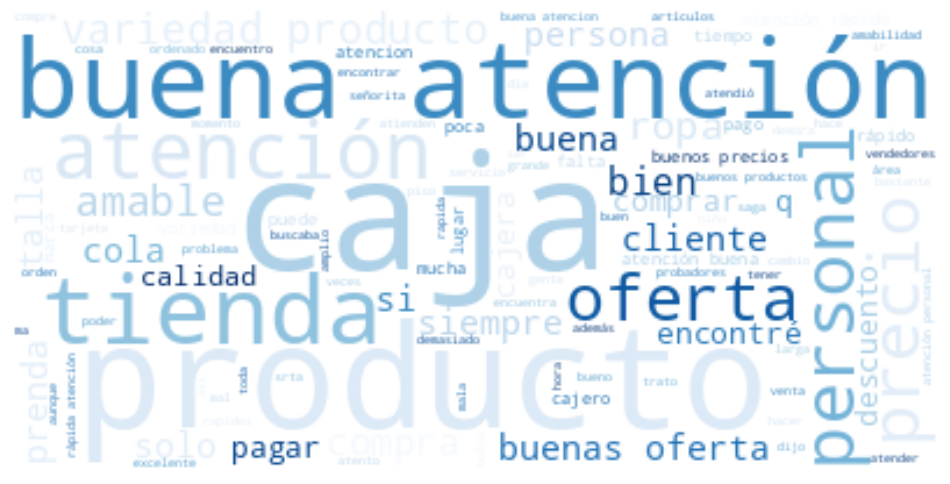

In [40]:
from wordcloud import WordCloud

words_cloud = ' '.join(df_reviews['lemma'].to_list())

wc = WordCloud(background_color='white', contour_width=1, contour_color='black', colormap = 'Blues').generate(words_cloud)
plt.figure(figsize=[12,12])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##3.3. Analisis de sentimiento

###3.3.1. Transformers

In [41]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.7 MB/s eta 0:00:00


In [42]:
import transformers
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis',
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

In [43]:
# No considerar comentarios mayores a 500 caracteres
df_reviews_tr = df_reviews[df_reviews['text'].apply(lambda x: len(x) < 500)]

In [45]:
transformers_analyzed = df_reviews_tr.copy()

for index, row in transformers_analyzed.iterrows():
  result = sentiment_pipeline(row['text'])[0]
  transformers_analyzed.at[index, 'score'] = result['score']
  transformers_analyzed.at[index, 'label'] = result['label']

transformers_analyzed.head()

,store_id,store,text,lemma,score,label
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos...",local comercial pesar tener pisos visitar pequ...,0.313426,3 stars
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...,falabella tienda departamentos chilena fama ni...,0.416232,5 stars
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...,buen lugar hacer compras hogar oficina terraza...,0.576080,4 stars
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e...",hace semanas caos piso ropa dama solo probador...,0.729787,1 star
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...,buenas oferta horita temporada inviernos vi ca...,0.583972,5 stars


In [46]:
transformers_analyzed["sentiment"] = transformers_analyzed["score"].apply(lambda x: "Negativo" if x < 0.5 else "Neutro" if x < 0.6 else "Positivo" if x < 1 else "Indefinido")
transformers_analyzed

,store_id,store,text,lemma,score,label,sentiment
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos...",local comercial pesar tener pisos visitar pequ...,0.313426,3 stars,Negativo
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...,falabella tienda departamentos chilena fama ni...,0.416232,5 stars,Negativo
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...,buen lugar hacer compras hogar oficina terraza...,0.576080,4 stars,Neutro
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e...",hace semanas caos piso ropa dama solo probador...,0.729787,1 star,Positivo
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...,buenas oferta horita temporada inviernos vi ca...,0.583972,5 stars,Neutro
...,...,...,...,...,...,...,...
1645,31,T. TRUJILLO MALL,Porque no hay rapidez en la entrega de los pro...,rapidez entrega productos demoré horas esperan...,0.429836,2 stars,Negativo
1646,31,T. TRUJILLO MALL,Porque deberían haber más cajas instaladas par...,deberían haber cajas instaladas evitar cola de...,0.334872,3 stars,Negativo
1647,31,T. TRUJILLO MALL,"Falta personal en caja , colas que imoasientan",falta personal caja cola imoasientan,0.496402,1 star,Negativo
1648,31,T. TRUJILLO MALL,Estab adesordenado un probador.lonusabab de al...,estab adesordenado almacén veían cajas mala pr...,0.435164,2 stars,Negativo


Tienda:  T. ANGAMOS 
-----------------------------
Negativo    30
Neutro      16
Positivo     8
Name: sentiment, dtype: int64


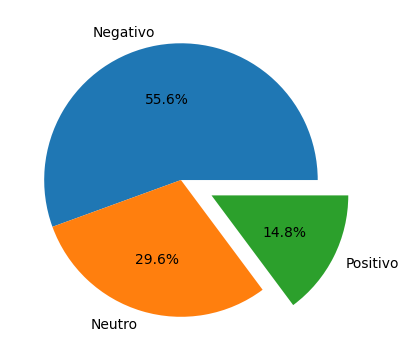

Tienda:  T. AREQUIPA CAYMA 
-----------------------------
Negativo    34
Neutro      14
Positivo     4
Name: sentiment, dtype: int64


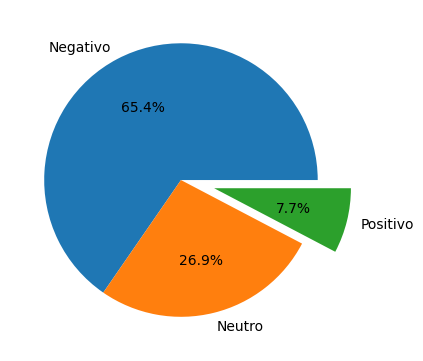

Tienda:  T. AREQUIPA PORONGOCHE 
-----------------------------
Negativo    31
Neutro      13
Positivo     8
Name: sentiment, dtype: int64


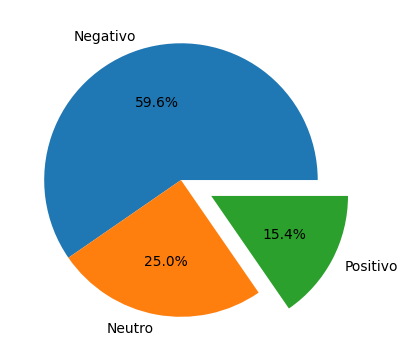

Tienda:  T. ATOCONGO 
-----------------------------
Negativo    32
Positivo    12
Neutro      11
Name: sentiment, dtype: int64


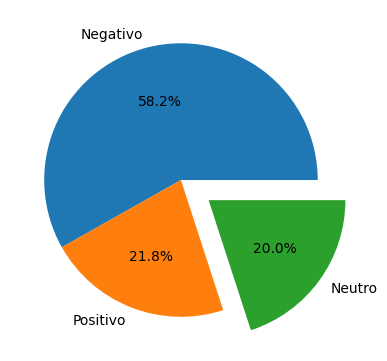

Tienda:  T. BELLAVISTA 
-----------------------------
Negativo    34
Neutro      15
Positivo     5
Name: sentiment, dtype: int64


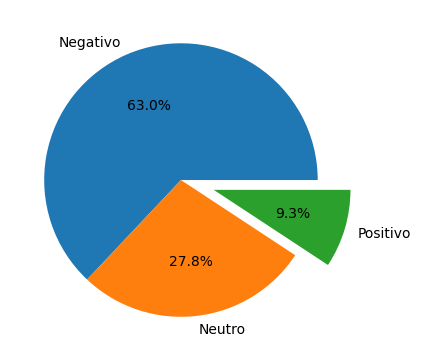

Tienda:  T. CAJAMARCA 
-----------------------------
Negativo    30
Neutro      16
Positivo     8
Name: sentiment, dtype: int64


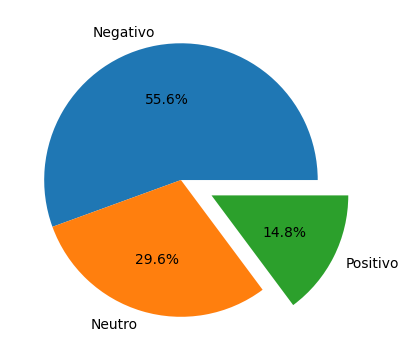

Tienda:  T. CAÑETE 
-----------------------------
Negativo    26
Neutro      16
Positivo    13
Name: sentiment, dtype: int64


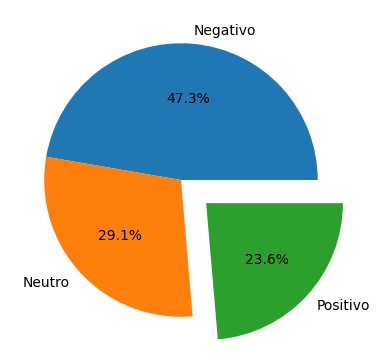

Tienda:  T. CENTRO CIVICO 
-----------------------------
Negativo    33
Neutro      11
Positivo    10
Name: sentiment, dtype: int64


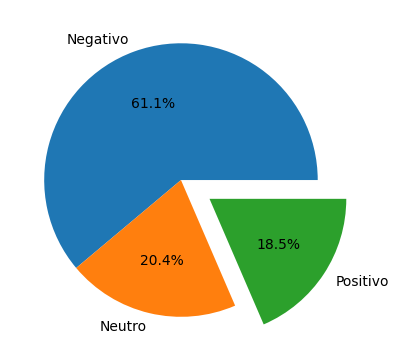

Tienda:  T. CHICLAYO 
-----------------------------
Negativo    29
Neutro      16
Positivo    10
Name: sentiment, dtype: int64


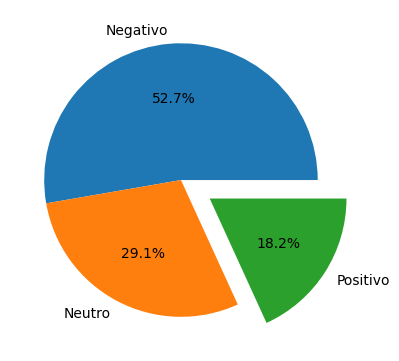

Tienda:  T. CHIMBOTE 
-----------------------------
Negativo    33
Neutro      15
Positivo     7
Name: sentiment, dtype: int64


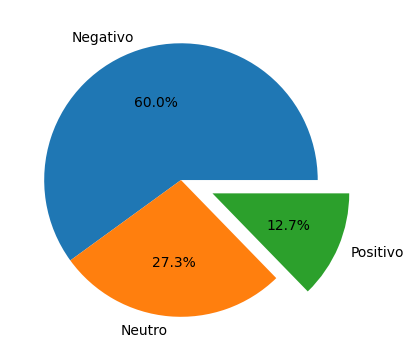

Tienda:  T. COMAS 
-----------------------------
Negativo    31
Neutro      15
Positivo     8
Name: sentiment, dtype: int64


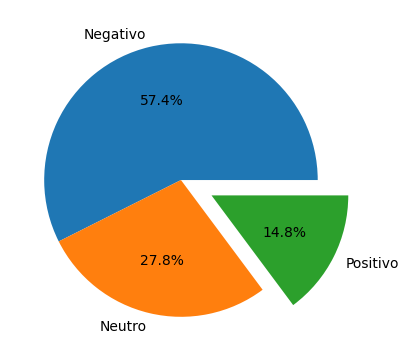

Tienda:  T. CUSCO 
-----------------------------
Negativo    35
Neutro      10
Positivo     8
Name: sentiment, dtype: int64


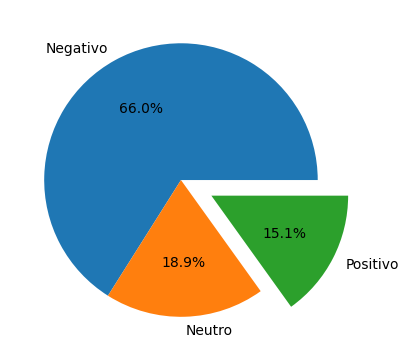

Tienda:  T. HUANCAYO 
-----------------------------
Negativo    32
Neutro      17
Positivo     6
Name: sentiment, dtype: int64


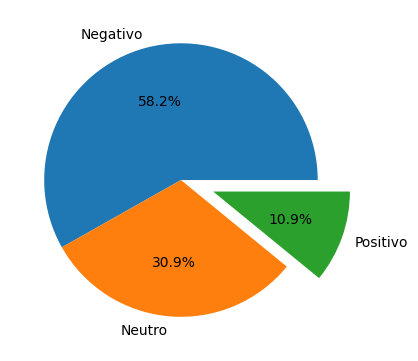

Tienda:  T. HUANUCO 
-----------------------------
Negativo    35
Neutro      13
Positivo     7
Name: sentiment, dtype: int64


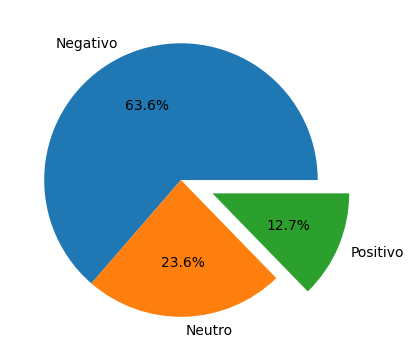

Tienda:  T. ICA MALL 
-----------------------------
Negativo    33
Neutro      14
Positivo     6
Name: sentiment, dtype: int64


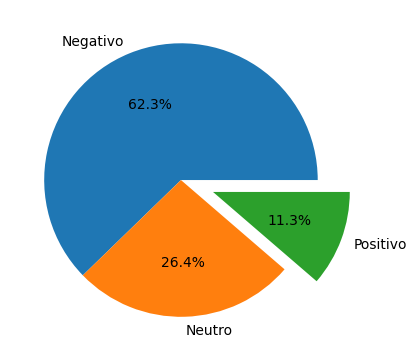

Tienda:  T. JOCKEY PLAZA 
-----------------------------
Negativo    28
Positivo    14
Neutro      11
Name: sentiment, dtype: int64


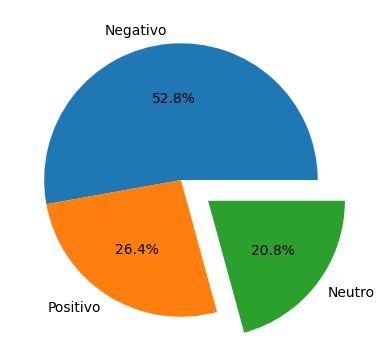

Tienda:  T. LIMA CENTRO 
-----------------------------
Negativo    30
Positivo    13
Neutro      12
Name: sentiment, dtype: int64


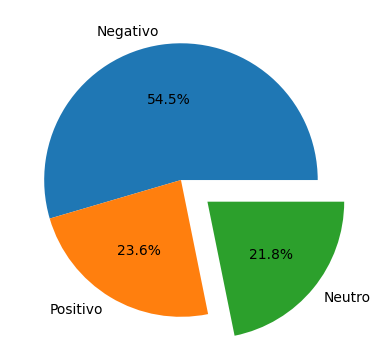

Tienda:  T. LIMA NORTE 
-----------------------------
Negativo    28
Neutro      14
Positivo    11
Name: sentiment, dtype: int64


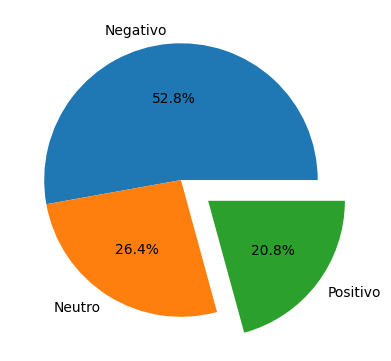

Tienda:  T. MALL DEL SUR 
-----------------------------
Negativo    27
Neutro      17
Positivo     8
Name: sentiment, dtype: int64


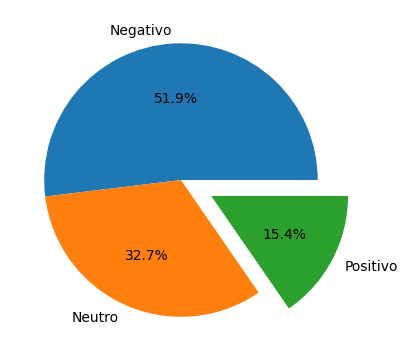

Tienda:  T. MEGA PLAZA 
-----------------------------
Negativo    37
Neutro      12
Positivo     6
Name: sentiment, dtype: int64


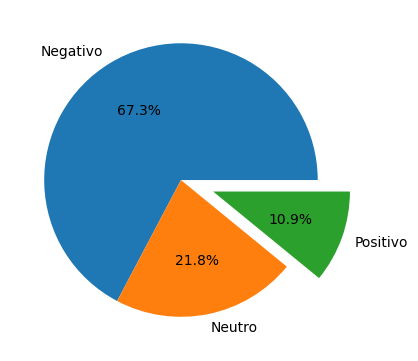

Tienda:  T. MIRAFLORES 
-----------------------------
Negativo    32
Neutro      16
Positivo     7
Name: sentiment, dtype: int64


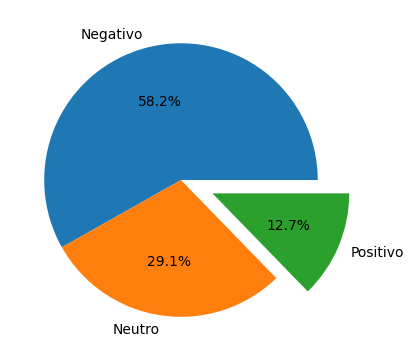

Tienda:  T. PIURA CENTRO 
-----------------------------
Negativo    35
Positivo    11
Neutro       8
Name: sentiment, dtype: int64


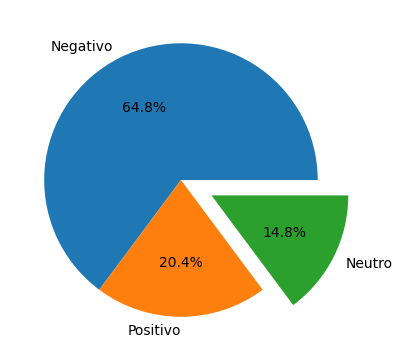

Tienda:  T. PIURA MALL 
-----------------------------
Negativo    29
Neutro      14
Positivo    12
Name: sentiment, dtype: int64


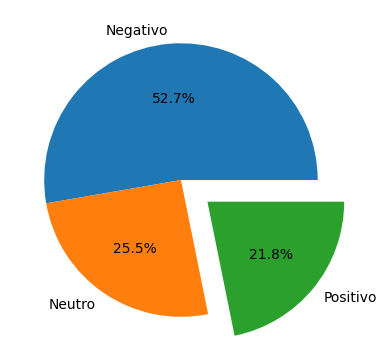

Tienda:  T. PUCALLPA 
-----------------------------
Negativo    33
Neutro      14
Positivo     7
Name: sentiment, dtype: int64


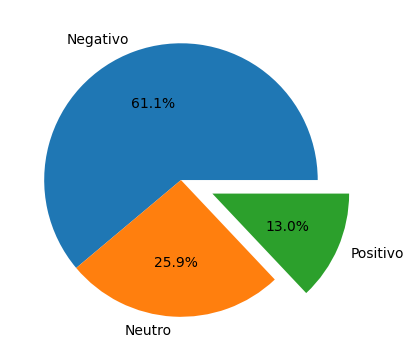

Tienda:  T. PURUCHUCO 
-----------------------------
Negativo    32
Neutro      15
Positivo     6
Name: sentiment, dtype: int64


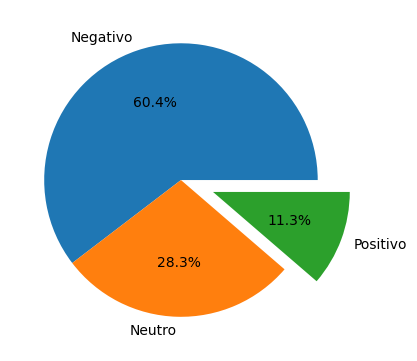

Tienda:  T. SALAVERRY 
-----------------------------
Negativo    27
Neutro      15
Positivo    10
Name: sentiment, dtype: int64


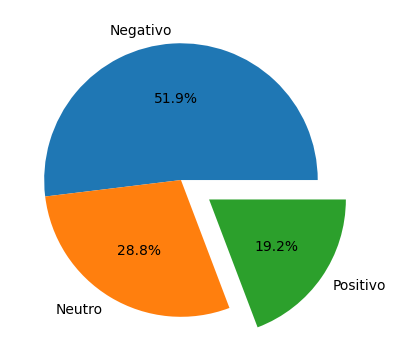

Tienda:  T. SAN ISIDRO 
-----------------------------
Negativo    38
Neutro      10
Positivo     7
Name: sentiment, dtype: int64


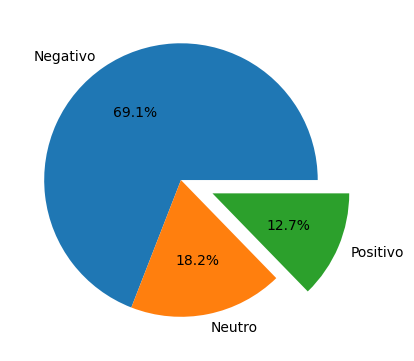

Tienda:  T. SAN MIGUEL 
-----------------------------
Negativo    33
Neutro      11
Positivo     9
Name: sentiment, dtype: int64


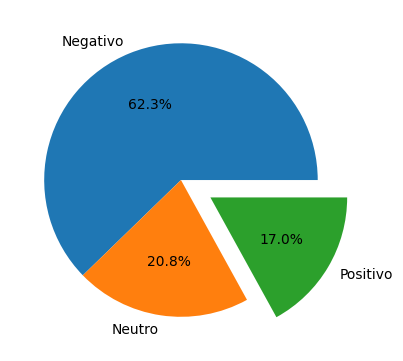

Tienda:  T. SANTA ANITA 
-----------------------------
Negativo    26
Neutro      14
Positivo    13
Name: sentiment, dtype: int64


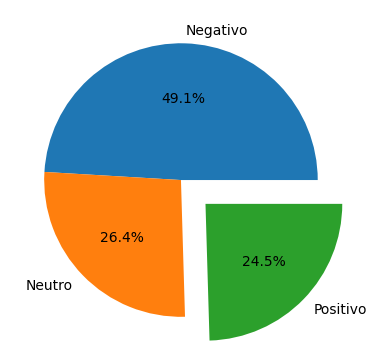

Tienda:  T. TRUJILLO MALL 
-----------------------------
Negativo    35
Neutro      12
Positivo     7
Name: sentiment, dtype: int64


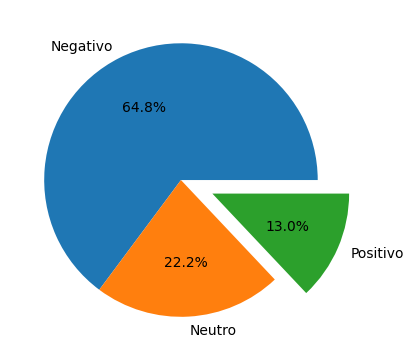

In [47]:
# Visualziación
import matplotlib.pyplot as plt
%matplotlib inline

list_rows = transformers_analyzed.drop_duplicates(subset=['store_id', 'store'])

for index, row in list_rows.iterrows():
  reviews_store = transformers_analyzed[transformers_analyzed['store_id'] == row['store_id']]
  summary = reviews_store.sentiment.value_counts()
  print('Tienda: ', row['store'],'\n-----------------------------')
  print(summary)
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,2)
  if len(summary.values) == 3:
    explode = (0, 0, 0.25)
  else:
    explode = (0, 0.25)

  plt.pie(summary.values, labels = summary.index, explode = explode, autopct='%1.1f%%', shadow=False)
  plt.show()